# Imports

In [1]:
# Required for autocnet imports
import os
os.environ['ISISROOT'] = '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0'

# Autocnet Imports
from autocnet.graph.network import NetworkCandidateGraph

# Helpful Python Modules
import matplotlib.pyplot as plt  #     plotting package
import numpy as np               #     numerical computing package

# Ingestion of Network into DataFrame

If you just want to explore your network __without__ the benefit of DB queries, you can ingest the network into a pandas DataFrame

In [2]:
from plio.io.io_controlnetwork import from_isis

cnet_path = 'AS15_landingsite_apollolro_jig1.net'
cnet_df = from_isis(cnet_path)

In [3]:
# Preview of the Data
cnet_df.head()

,id,pointType,pointChoosername,pointDatetime,pointEditLock,pointIgnore,pointJigsawRejected,referenceIndex,aprioriSurfPointSource,aprioriSurfPointSourceFile,...,measureDatetime,measureEditLock,measureIgnore,measureJigsawRejected,diameter,apriorisample,aprioriline,samplesigma,linesigma,measureLog
0,M102128467LE_bndry_11,2,cnetmerge,2020-11-03T10:11:06,False,False,False,3,2,,...,2020-11-03T10:11:06,False,False,False,0.0,5038.500000,1047.500000,0.0,0.0,"[MinimumPixelZScore: -4.978048566276621, Maxim..."
1,M102128467LE_bndry_11,2,cnetmerge,2020-11-03T10:11:06,False,False,False,3,2,,...,2020-11-03T10:11:06,False,False,False,0.0,202.773371,1198.122737,0.0,0.0,"[MinimumPixelZScore: -4.978048566276621, Maxim..."
2,M102128467LE_bndry_11,2,cnetmerge,2020-11-03T10:11:06,False,False,False,3,2,,...,2020-11-03T10:11:06,False,False,False,0.0,2740.427923,1446.410708,0.0,0.0,"[MinimumPixelZScore: -4.978048566276621, Maxim..."
3,M102128467LE_bndry_11,2,cnetmerge,2020-11-03T10:11:06,False,False,False,3,2,,...,2020-11-03T10:11:06,False,False,False,0.0,3801.934918,378.231158,0.0,0.0,[]
4,M102128467LE_bndry_15,2,cnetmerge,2020-11-03T10:11:06,False,False,False,2,2,,...,2020-11-03T10:11:06,False,False,False,0.0,4992.803228,5091.866958,0.0,0.0,"[MinimumPixelZScore: -1.9724331294777808, Maxi..."


In [4]:
# Exhaustive list of available data columns
cnet_df.columns

Index(['id', 'pointType', 'pointChoosername', 'pointDatetime', 'pointEditLock',
       'pointIgnore', 'pointJigsawRejected', 'referenceIndex',
       'aprioriSurfPointSource', 'aprioriSurfPointSourceFile',
       'aprioriRadiusSource', 'aprioriRadiusSourceFile', 'latitudeConstrained',
       'longitudeConstrained', 'radiusConstrained', 'aprioriX', 'aprioriY',
       'aprioriZ', 'aprioriCovar', 'adjustedX', 'adjustedY', 'adjustedZ',
       'adjustedCovar', 'pointLog', 'serialnumber', 'measureType', 'sample',
       'line', 'sampleResidual', 'lineResidual', 'measureChoosername',
       'measureDatetime', 'measureEditLock', 'measureIgnore',
       'measureJigsawRejected', 'diameter', 'apriorisample', 'aprioriline',
       'samplesigma', 'linesigma', 'measureLog'],
      dtype='object')

In [5]:
cnet_df[["lineResidual","sampleResidual"]].describe()

,lineResidual,sampleResidual
count,4317.000000,4317.000000
mean,0.000054,0.000078
std,2.701972,0.514783
min,-143.158457,-10.220597
25%,-0.198241,-0.085599
50%,-0.002523,-0.000207
75%,0.189283,0.086179
max,67.881129,12.073319


In [6]:
cnet_df.loc[cnet_df["lineResidual"]>1].describe()

,pointType,referenceIndex,aprioriSurfPointSource,aprioriRadiusSource,aprioriX,aprioriY,aprioriZ,adjustedX,adjustedY,adjustedZ,measureType,sample,line,sampleResidual,lineResidual,diameter,apriorisample,aprioriline,samplesigma,linesigma
count,219.000000,219.000000,219.000000,219.000000,2.190000e+02,219.000000,219.000000,2.190000e+02,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.0,219.0
mean,2.059361,1.200913,2.091324,1.954338,1.562552e+06,118691.475206,747813.995193,1.562433e+06,117686.044561,748226.427638,1.776256,3015.595422,16790.540137,0.045223,2.310228,0.0,2868.208333,16703.565149,0.0,0.0
std,0.236840,1.073364,0.598827,0.299414,1.640733e+04,33633.445130,31374.590212,1.650620e+04,33354.932028,31466.616566,1.423970,1481.286550,19027.573156,1.491838,6.298338,0.0,1531.337966,19086.526427,0.0,0.0
min,2.000000,0.000000,2.000000,0.000000,1.520578e+06,43790.345475,685630.208333,1.520173e+06,41961.549388,685666.687587,0.000000,46.003134,268.875555,-10.220597,1.002095,0.0,-0.500000,-0.500000,0.0,0.0
25%,2.000000,0.000000,2.000000,2.000000,1.554147e+06,101049.612706,732099.903939,1.553925e+06,101069.225040,731923.590318,0.000000,1969.492701,2454.481841,-0.236304,1.188507,0.0,1749.993023,2309.730416,0.0,0.0
50%,2.000000,1.000000,2.000000,2.000000,1.566097e+06,104983.658208,744232.509155,1.566079e+06,104742.942567,744019.333236,3.000000,2991.131743,4383.274763,0.000867,1.464361,0.0,2926.796417,4350.381228,0.0,0.0
75%,2.000000,2.000000,2.000000,2.000000,1.571866e+06,135971.513815,764242.104971,1.571838e+06,134328.727884,764643.261852,3.000000,4260.667416,37825.937772,0.173471,1.922767,0.0,4126.965547,37822.491848,0.0,0.0
max,3.000000,6.000000,6.000000,2.000000,1.591697e+06,203133.327924,820678.842528,1.591781e+06,201429.307894,821591.802865,3.000000,5707.297243,51082.954913,9.175996,67.881129,0.0,5699.834548,51078.672848,0.0,0.0


#### Visualize Residuals

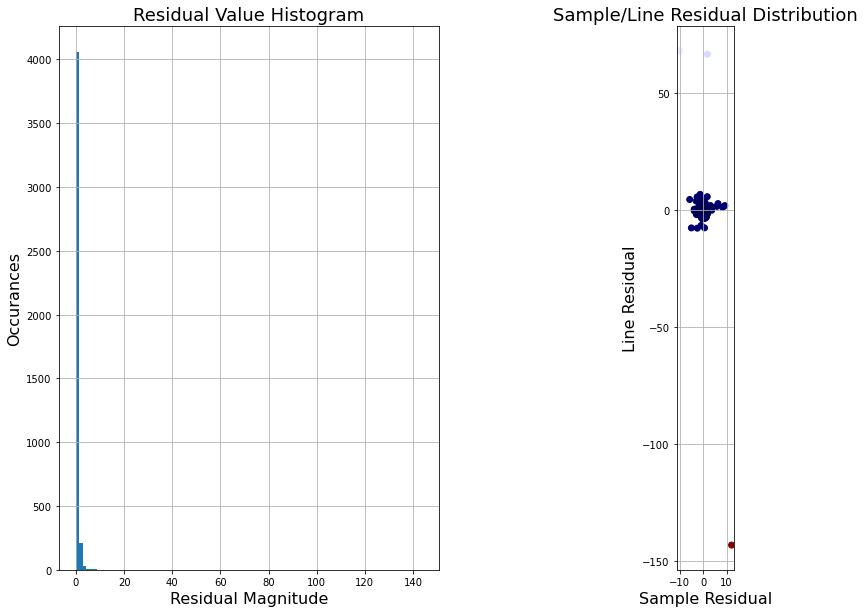

In [7]:
# list comprehension to resolve line/sample residuals
res = [np.linalg.norm((i, j)) for i, j in zip(cnet_df['sampleResidual'].values, cnet_df['lineResidual'].values)]


# Example Plot 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].hist(res, bins=100);
axs[0].grid();
axs[0].set_xlabel('Residual Magnitude', size=16);
axs[0].set_ylabel('Occurances', size=16);
axs[0].set_title('Residual Value Histogram', size=18);

point_color=np.array([0,0,1,0.01])
point_colors=res/np.max(res)
axs[1].scatter(cnet_df['sampleResidual'].values, cnet_df['lineResidual'].values, c=point_colors, cmap="seismic");
axs[1].grid();
axs[1].set_aspect("equal")
axs[1].set_xlabel('Sample Residual', size=16);
axs[1].set_ylabel('Line Residual', size=16);
axs[1].set_title('Sample/Line Residual Distribution', size=18);

# Ingestion of Network into Database

## Configuration Files
Configuration files in AutoCNet are used to consilidate configuration information for the various services AutoCNet leverages. AutoCNet uses a cluster to quickly process large jobs in parallel, conda environments to give the cluster access to necessary function suites, redis queues to manage jobs, and a database to store resulting network data. Expectations for config file:
- Cluster config info 
- Database config info 
- Conda environment config info 
- Redis queue config info 
- Spatial reference setup 
- OPTIONAL (if using service) -> Pfeffernusse url

This information can be stored as nested dictionaries or as a yaml file. 
- For an example of the yml configuration of this data see: **autocnet/config/demo.yml**.

In [8]:
# Config stored as nested dictionary
example_config_dict = {}

example_config_dict['cluster'] = {'maxfailures': 3, # The number of times to retry a failing cluster job
                     'queue': 'shortall', # Which processing queue should be used?
                     'cluster_log_dir': '/logs', # Location to put <jobid.log> files for cluster jobs
                     'cluster_submission': 'slurm', # What cluster submission tool should be used. slurm or pbs
                     'tmp_scratch_dir': '/scratch', # What scratch or temporary area should be used for temporary file creation
                     'extractor_memory': 8192, # The amount of RAM (in MB) to request for jobs
                     'processing_memory': 1024}

example_config_dict['database'] = {'type': 'postgresql', # Name of the database management system. For example, postgresql or sqlite
                      'username': 'jay', # Username used to log in to the database
                      'password': 'abcde', # Password used to log in to the database
                      'host': 'autocnet.wr.usgs.gov', # Host machine name (or localhost) where the database is running
                      'port': 5432,  # Port that the database is exposed on
                      'pgbouncer_port': 30001, # Port where a proxy that manages database connections is running
                      'name': 'isis_ingest_tutorial', # The name of the database to connect to.  Tables will be created inside this DB. This needs to be all lowercase for PostGreSQL!
                      'timeout': 500} # The number of seconds to wait while attemping to connect to the DB.

example_config_dict['env'] =  {'conda': 'autocnet', # The name of a conda environment to initialize for cluster jobs 
                 'ISISROOT': '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0', # PATH to the ISISROOT directory
                 'ISISDATA': '/usgs/cpkgs/isis3/data'} # PATH to the ISISDATA directory

example_config_dict['redis'] = {'basename': 'tut_ISISingest', # Name of the redis queue. Ensure it is unique to avoid multiple use of the same redis queue.
                   'host': 'localhost', # Hostname (or localhost) where the redis server is running
                   'port': '8084', # Port that redis is accepting connections on
                   'completed_queue': 'tut_ii:done', # The name of the queue that successful job messages are pushed. This name should be unique to avoid collision with other users.
                   'processing_queue': 'tut_ii:proc', # The name of the queue used for jobs that need to be started. This name should be unique to avoid collision with other users.
                   'working_queue': 'tut_ii:working'} # The name of the queue that currently processing jobs are pushed to. This name should be unique to avoid collision with other users.

example_config_dict['spatial'] = {'latitudinal_srid': 949900, # The spatial reference identifier for latitudinal geometries in the database.
                     'rectangular_srid': 949980, # The spatial reference identifier for rectangular geometries in the database.
                     'semimajor_rad': 3396190, # The radii of the body. If the body is a sphere, these values should match. Units are in meters
                     'semiminor_rad': 3376200, 
                     'proj4_str': '+proj:longlat +a:3396190 +b:3376200 +no_defs',  # A compliant proj4 string. Checkout http://spatialreference.org for examples for planetary bodies.
                     'dem': None, # DEM used to generate height values for projection
                     'target': 'MARS'} # Target for ISIS

print(example_config_dict)

{'cluster': {'maxfailures': 3, 'queue': 'shortall', 'cluster_log_dir': '/logs', 'cluster_submission': 'slurm', 'tmp_scratch_dir': '/scratch', 'extractor_memory': 8192, 'processing_memory': 1024}, 'database': {'type': 'postgresql', 'username': 'jay', 'password': 'abcde', 'host': 'autocnet.wr.usgs.gov', 'port': 5432, 'pgbouncer_port': 30001, 'name': 'isis_ingest_tutorial', 'timeout': 500}, 'env': {'conda': 'autocnet', 'ISISROOT': '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0', 'ISISDATA': '/usgs/cpkgs/isis3/data'}, 'redis': {'basename': 'tut_ISISingest', 'host': 'localhost', 'port': '8084', 'completed_queue': 'tut_ii:done', 'processing_queue': 'tut_ii:proc', 'working_queue': 'tut_ii:working'}, 'spatial': {'latitudinal_srid': 949900, 'rectangular_srid': 949980, 'semimajor_rad': 3396190, 'semiminor_rad': 3376200, 'proj4_str': '+proj:longlat +a:3396190 +b:3376200 +no_defs', 'dem': None, 'target': 'MARS'}}


## Instantiating a NetworkCandidateGraph

Two ways to create a NetworkCandidateGraph (NCG)
- Instantiate NCG, configure, add\_from\_\* in three seperate calls
- Use class method to instanciate and configure NCG in a single call

### Instantiate, explicit configure, explicit additions

In [9]:
ncg = NetworkCandidateGraph() # creates "empty" NCG
print(dir(ncg)) # see all associated methods
# ncg.from_database? # read individual doc strings

['_CandidateGraph__key', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_execute_sql', '_measure_id', '_node', '_order_adjacency', '_point_id', '_push_iterable_message', '_push_obj_messages', '_push_row_messages', '_setup_database', '_setup_dem', '_setup_edges', '_setup_queues', '_update_date', 'add_edge', 'add_edges_from', 'add_from_filelist', 'add_from_remote_database', 'add_image', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'apply', 'apply_func_to_edges', 'apply_iterable_options', 'clean_singles', 'clear', 'clear_db', 'cluster_propagate_

Configuration files in AutoCNet can run in two ways; as a python dictionary, or as a path to configuration (yaml) file.  

In [10]:
# option 1: yaml file path
config_path = 'config.yml'
ncg.config_from_file(config_path)

# option 2: dictionary
config_dict = example_config_dict
ncg.config_from_dict(config_dict) # attaches configuration file to NCG

In [11]:
from plio.utils.utils import file_to_list

lis_path = "AS15_landingsite_apollolro.lis"
filelist = file_to_list(lis_path)

for f in filelist:
    print(f)
    ncg.add_image(f) # adds single image

/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/AS15-M-0583_msk_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/AS15-M-0584_msk_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/AS15-M-0585_msk_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/AS15-M-0586_msk_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/AS15-M-0587_msk_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/M102128467LE.lev1_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/M102128467RE.lev1_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/M102135625LE.lev1_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/M102135625RE.lev1_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/M102142784LE.lev1_8b.cub
/work/users/bhwheeler/autocnet/docs/users/tutorials/isis_ingestion/M102142784RE.lev1_8b.cu

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),


### Instantiating with a class method

In [12]:
lis_path = "AS15_landingsite_apollolro.lis"

# option 1: yaml file path
config_path = 'config.yml'
config = config_path
# option 2: dictionary
config_dict = example_config_dict
config = config_dict

ncg = NetworkCandidateGraph.from_filelist(lis_path, config, clear_db=True)

/work/users/ladoramkershner/projects/autocnet/autocnet/graph/network.py:2119: UserWarning: Failed to reset primary id sequence for table costs
  warnings.warn(f'Failed to reset primary id sequence for table {t}')


loading 1 of 11
loading 2 of 11
loading 3 of 11
loading 4 of 11
loading 5 of 11
loading 6 of 11
loading 7 of 11
loading 8 of 11
loading 9 of 11
loading 10 of 11
loading 11 of 11


## Ingesting Control Points

In [13]:
cnet_path = "AS15_landingsite_apollolro_jig1.net"

ncg.place_points_from_cnet(cnet_path) 

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/pyproj/transformer.py:446: UserWarning: radian input with pipelines is not supported and may result in unexpected transformations.
  errcheck=errcheck,
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/s

## Check Database is Populated

Check that there are images in the database

In [14]:
from autocnet.io.db.model import Images

with ncg.session_scope() as session:
    res = session.query(Images).all()
    print(f'There are {len(res)} images in the database \n')
    
    print('Image serial numbers:')
    for image in res:
        print(image.serial)

There are 11 images in the database 

Image serial numbers:
APOLLO15/METRIC/1971-07-31T14:00:53.547
APOLLO15/METRIC/1971-07-31T14:01:16.947
APOLLO15/METRIC/1971-07-31T14:01:40.346
APOLLO15/METRIC/1971-07-31T14:02:03.751
APOLLO15/METRIC/1971-07-31T14:02:27.179
LRO/1/269182000:51104/NACL
LRO/1/269182000:51104/NACR
LRO/1/269189158:41274/NACL
LRO/1/269189158:41274/NACR
LRO/1/269196317:57658/NACL
LRO/1/269196317:57658/NACR


Check that there are points in the database

In [15]:
from autocnet.io.db.model import Images, Points
with ncg.session_scope() as session:
    res = session.query(Points).all()
    print(f'There are {len(res)} points in the database \n')
    
    print('Top 10 point geometries:')
    for i in range(0,10):
        print(f'point {res[i].id} geom: ', res[i].geom)

There are 1520 points in the database 

Top 10 point geometries:
point 1 geom:  POINT (7.639547246117147 28.06748420810278)
point 2 geom:  POINT (7.547283880493469 27.48774581612326)
point 3 geom:  POINT (7.579919758639894 27.26963103293907)
point 4 geom:  POINT (7.459885444579305 26.97474163061847)
point 5 geom:  POINT (7.451483152960921 26.71043426353925)
point 6 geom:  POINT (7.413314266355345 26.46978163350444)
point 7 geom:  POINT (7.439286790307709 26.24006229854585)
point 8 geom:  POINT (7.384350485991654 25.94147167738798)
point 9 geom:  POINT (7.413458008955812 25.70318331127867)
point 10 geom:  POINT (7.356273109503848 25.47603397454377)


At this point, it is worth checking autocnet to make sure the images have loaded correctly:
- Go to: autocnet.wr.usgs.gov  (pg admin)
- Right click on your database and select query tool
- Type "SELECT * FROM images" and press the lightning bolt button. 
    - If you expect a large return, you can speed up query by using "SELECT COUNT(*) FROM images" .  
- Click the eyeball next to the geom column to show the image footprints